# Rocket League bot

## Collect data

In [1]:
import cv2
import numpy as np

training_dataset = "training_data_2021-02-15-1"
data = np.load("training_data/"+training_dataset+"/training_data-1.npy",allow_pickle=True)

'''
Convert keys to a ...multi-hot... array
    0  1  2  3  4   5   6   7    8
[Z, S, Q, D, ZQ, ZD, SQ, SD, NOKEY] boolean values.
A replaced by Q for french keyboard
'''
data[0][1]

[0, 0, 0, 0, 1, 0, 0, 0, 0]

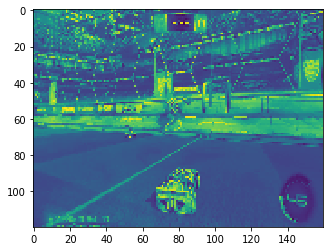

In [2]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0])

In [19]:
import os

training_dataset = "training_data_2021-02-15-1"

l = os.listdir("training_data/"+training_dataset)
# l[0]
len(l)

52

In [20]:
data = np.load("training_data/"+training_dataset+"/"+l[0],allow_pickle=True)
data[0][0]
# data[0][0].size

array([[100, 117, 121, ...,  49, 102,  47],
       [ 89,  88,  91, ..., 171, 226, 233],
       [141, 109, 124, ...,  73,  43,  59],
       ...,
       [ 54,  52,  58, ...,  58,  57,  58],
       [ 51,  50,  56, ...,  56,  58,  58],
       [ 56,  55,  55, ...,  56,  54,  57]], dtype=uint8)

In [21]:
data[0].size

2

## Balance data

In [22]:
import numpy as np
train_data = np.load("training_data/"+training_dataset+"/"+l[0],allow_pickle=True)
for file in l[1:]:
    load_data = np.load("training_data/"+training_dataset+"/"+file,allow_pickle=True)
    train_data = np.concatenate((train_data,load_data))

print ("Train Data: ", train_data.shape)

Train Data:  (26000, 2)


In [23]:
train_data[0][1]

[0, 0, 0, 0, 1, 0, 0, 0, 0]

In [24]:
# z = [1,0,0,0,0,0,0,0,0]
# s = [0,1,0,0,0,0,0,0,0]
# q = [0,0,1,0,0,0,0,0,0]
# d = [0,0,0,1,0,0,0,0,0]
# zq = [0,0,0,0,1,0,0,0,0]
# zd = [0,0,0,0,0,1,0,0,0]
# sq = [0,0,0,0,0,0,1,0,0]
# sd = [0,0,0,0,0,0,0,1,0]
# nk = [0,0,0,0,0,0,0,0,1]

In [25]:
z = []
s = []
q = []
d = []

for data in train_data:
    img = data[0]
    choice = data[1]

    if choice == [1,0,0,0,0,0,0,0,0]:
        z.append([img,choice])
    elif choice == [0,1,0,0,0,0,0,0,0]:
        s.append([img,choice])
    elif choice == [0,0,1,0,0,0,0,0,0]:
        q.append([img,choice])
    elif choice == [0,0,0,1,0,0,0,0,0]:
        d.append([img,choice])

In [26]:
len(z),len(s),len(q),len(d)

(8101, 95, 1280, 1588)

In [27]:
zq = []
zd = []
sq = []
sd = []
nk = []

for data in train_data:
    img = data[0]
    choice = data[1]

    if choice == [0,0,0,0,1,0,0,0,0]:
        zq.append([img,choice])
    elif choice == [0,0,0,0,0,1,0,0,0]:
        zd.append([img,choice])
    elif choice == [0,0,0,0,0,0,1,0,0]:
        sq.append([img,choice])
    elif choice == [0,0,0,0,0,0,0,1,0]:
        sd.append([img,choice])
    elif choice == [0,0,0,0,0,0,0,0,1]:
        nk.append([img,choice])

In [28]:
len(zq),len(zd),len(sq),len(sd),len(nk)

(3704, 3298, 265, 239, 7430)

In [14]:
z1 = z[:len(q)]

In [15]:
z2 = z[:len(q)][:len(d)]

In [18]:
z3 = z[:len(q)][:len(d)][:len(zq)][:len(zd)]

In [19]:
len(z1),len(z2),len(z3)

(1280, 1280, 1280)

In [29]:
# equilize everything
z = z[:len(q)][:len(d)][:len(zq)][:len(zd)]
# s ignored for training
q = q[:len(z)]
d = d[:len(z)]
zq = zq[:len(z)]
zd = zd[:len(z)]
# sq ignored
# sd ignored
nk = nk[:len(z)]

In [36]:
final_data = z + q + d + zq + zd + nk
len(final_data)

7680

In [46]:
# Execute balance_data.py
balanced_data = np.load("training_data/training_data_2021-02-15-1-balanced.npy",allow_pickle=True)

In [47]:
# 1280*6 == no breaking (s,sq,sd)
balanced_data.shape

(6936, 2)

In [49]:
z = []
s = []
q = []
d = []
zq = []
zd = []
sq = []
sd = []
nk = []

for data in balanced_data:
    img = data[0]
    choice = data[1]

    if choice == [1,0,0,0,0,0,0,0,0]:
        z.append([img,choice])
    elif choice == [0,1,0,0,0,0,0,0,0]:
        s.append([img,choice])
    elif choice == [0,0,1,0,0,0,0,0,0]:
        q.append([img,choice])
    elif choice == [0,0,0,1,0,0,0,0,0]:
        d.append([img,choice])
    if choice == [0,0,0,0,1,0,0,0,0]:
        zq.append([img,choice])
    elif choice == [0,0,0,0,0,1,0,0,0]:
        zd.append([img,choice])
    elif choice == [0,0,0,0,0,0,1,0,0]:
        sq.append([img,choice])
    elif choice == [0,0,0,0,0,0,0,1,0]:
        sd.append([img,choice])
    elif choice == [0,0,0,0,0,0,0,0,1]:
        nk.append([img,choice])

len(z),len(q),len(d),len(s),len(zq),len(zd),len(sq),len(sd),len(nk)

(1156, 1156, 1156, 0, 1156, 1156, 0, 0, 1156)

## Test model

In [1]:
import numpy as np
from grabscreen import grab_screen
import cv2
import time
from directkeys import PressKey,ReleaseKey, Z, Q, S, D
from alexnet import alexnet
from getkeys import key_check
import random

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
WIDTH = 160
HEIGHT = 120
LR = 1e-3
EPOCHS = 10
MODEL_NAME = 'model/rocket-{}-{}-{}-epochs-300K-data.model'.format(LR, 'alexnetv2',EPOCHS)

model = alexnet(WIDTH, HEIGHT, LR)
model.load(MODEL_NAME)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
INFO:tensorflow:Restoring parameters from d:\devel\rocket\model\rocket-0.001-alexnetv2-10-epochs-300K-data.model


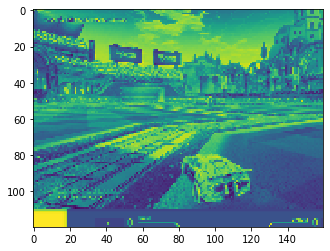

In [5]:
import matplotlib.pyplot as plt
screen = grab_screen(region=(0,40,800,640))
screen = cv2.cvtColor(screen, cv2.COLOR_BGR2GRAY)
screen = cv2.resize(screen, (160,120))
plt.imshow(screen)

In [6]:
prediction = model.predict([screen.reshape(160,120,1)])[0]
print(prediction)

[6.8699503e-03 2.9856388e-05 3.2400351e-04 3.7930261e-03 3.4908470e-04
 1.6490561e-03 3.8073336e-05 3.5982095e-05 9.8691094e-01]


In [7]:
max(prediction)

0.98691094

In [8]:
screen = grab_screen(region=(0,40,800,640))
screen = cv2.cvtColor(screen, cv2.COLOR_BGR2GRAY)
screen = cv2.resize(screen, (160,120))
prediction = model.predict([screen.reshape(160,120,1)])[0]
print(prediction)

[3.5297421e-03 6.2191364e-05 7.3506111e-05 3.0006928e-02 1.9473579e-03
 2.8795417e-02 1.3009844e-04 8.0079655e-05 9.3537474e-01]
